### Author: Youchen (Victor) Zhang

In [112]:
reset -fs

## Graph 1 ##

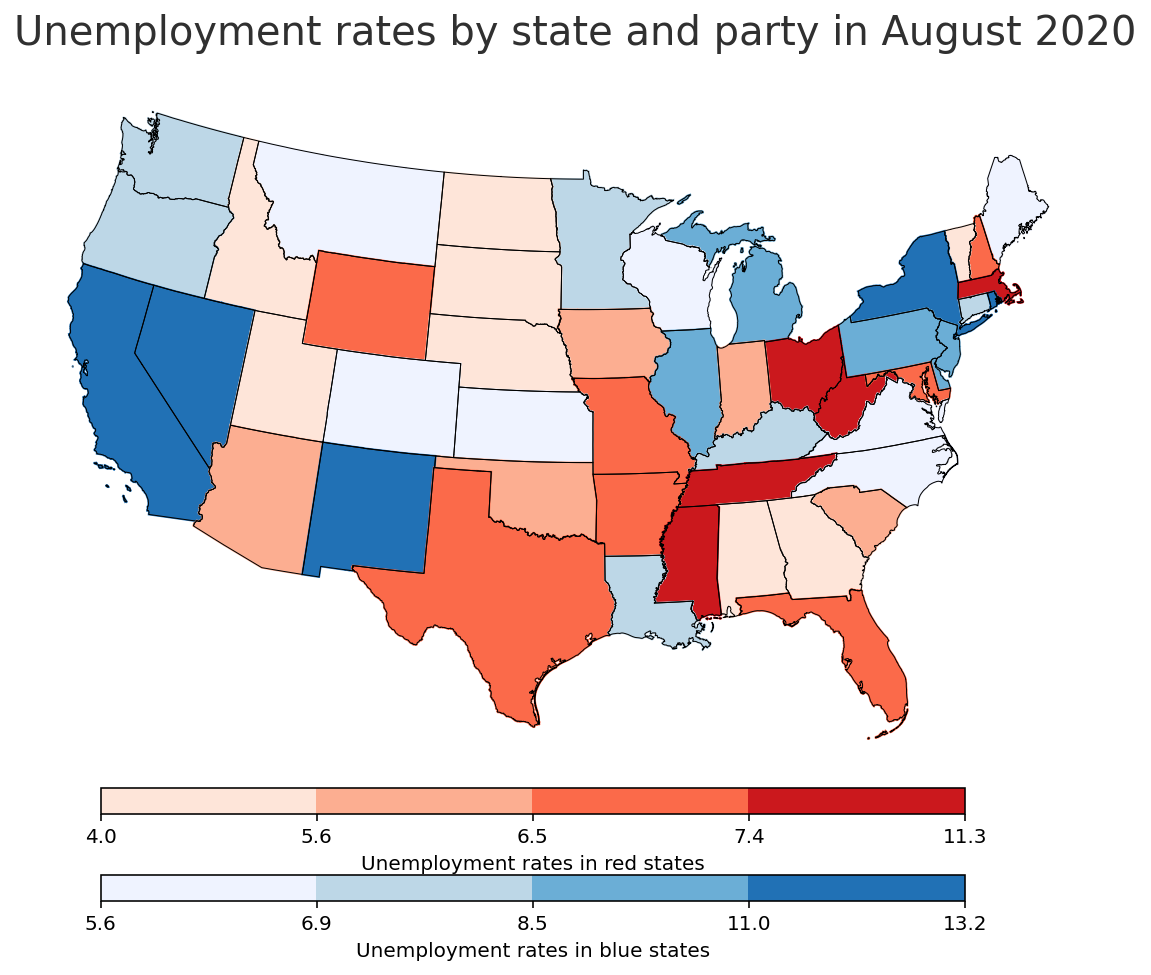

In [413]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

%config InlineBackend.figure_format = 'retina'

#https://www.bls.gov/web/laus/laumstrk.htm#laumstrk.f.p
#https://www.reddit.com/r/dataisbeautiful/comments/iz518h/percent_unemployment_by_state_and_party_oc/
#https://en.wikipedia.org/wiki/List_of_United_States_governors

d = {'state': ['Nebraska', 'Utah','Idaho','South Dakota','Vermont',
               'North Dakota', 'Alabama','Georgia','Montana','Oklahoma',
               'Arizona','Iowa','Virginia','Wisconsin', 'South Carolina',
               'Indiana','New Hampshire','North Carolina','Wyoming', 
               'Colorado','Texas','Kansas','Maine','Maryland','Missouri',
               'Alaska','Arkansas','Florida','Minnesota','Kentucky',
               'Louisiana','Oregon','Mississippi','Connecticut','District of Columbia',
               'Tennessee','Washington','Michigan','Delaware','Ohio','West Virginia',
               'Pennsylvania','New Jersey','Illinois','Massachusetts','New Mexico',
               'California','Hawaii','New York','Rhode Island','Nevada'], 
     'August 2020 unemployment rate': [4.0, 4.1, 4.2,4.8,4.8,5.0,5.6,5.6,5.6,
                                       5.7,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.5,6.6,
                                       6.7,6.8,6.9,6.9,6.9,7.0,7.4,7.4,7.4,7.4,
                                       7.6,7.6,7.7,7.9,8.1,8.5,8.5,8.5,8.7,8.9,
                                       8.9,8.9,10.3,10.9,11.0,11.3,11.3,11.4,12.5,
                                       12.5,12.8,13.2], 
     'Party affiliation of current United States governors':['Republican','Republican','Republican','Republican',
                                                             'Republican','Republican','Republican','Republican',
                                                             'Democratic','Republican','Republican','Republican',
                                                             'Democratic','Democratic','Republican','Republican',
                                                             'Republican','Democratic','Republican','Democratic',
                                                             'Republican','Democratic','Democratic','Republican',
                                                             'Republican','Republican','Republican','Republican',
                                                             'Democratic','Democratic','Democratic','Democratic',
                                                             'Republican','Democratic','Democratic','Republican',
                                                             'Democratic','Democratic','Democratic','Republican',
                                                             'Republican','Democratic','Democratic','Democratic',
                                                             'Republican','Democratic','Democratic','Democratic',
                                                             'Democratic','Democratic','Democratic']}

df = pd.DataFrame(data=d)


democratic = df[df['Party affiliation of current United States governors']=='Democratic'].copy()
republican = df[df['Party affiliation of current United States governors']=='Republican'].copy()
republican_unemployment_rate = df[df['Party affiliation of current United States governors']=='Republican']['August 2020 unemployment rate']
democratic_unemployment_rate = df[df['Party affiliation of current United States governors']=='Democratic']['August 2020 unemployment rate']

# if you want 4 groups of color you need 5 quantiles 
q = np.linspace(0, 1, 5, endpoint=True) # equidistant numbers between 0 and 1
qr = republican_unemployment_rate.quantile(q=q)
qd = democratic_unemployment_rate.quantile(q=q)
qr.values
qd.values

republican_boundaries = qr.values
democratic_boundaries = qd.values
republican['color'] = pd.qcut(republican_unemployment_rate,4)
democratic['color'] = pd.qcut(democratic_unemployment_rate,4)

republican_colors = ['#fee5d9','#fcae91','#fb6a4a','#cb181d']
republican["color"] = pd.qcut(republican_unemployment_rate,4, labels=republican_colors)
republican["color"].values

democratic_colors = ['#eff3ff','#bdd7e7','#6baed6','#2171b5']
democratic["color"] = pd.qcut(democratic_unemployment_rate,4, labels=democratic_colors)
democratic["color"].values

state2color = {row['state']:row['color']  for i, row in republican.iterrows()}
democratic2color = {row['state']:row['color']  for i, row in democratic.iterrows()}
state2color.update(democratic2color)#merge two dictionary objects together

# Lambert Conformal map of lower 48 states.
fig, ax = plt.subplots(figsize=(12,6))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
shape = m.readshapefile('/Users/victor/Desktop/st99_d00', name='states', drawbounds=True)
ax = plt.gca() # get current axes instance
   
# list of states in the data
states = [shapedict['NAME'] for shapedict in m.states_info]
    
for i, seg in enumerate(m.states):
    state = states[i]
    if state == 'Puerto Rico':
        continue
    color = state2color[state]
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)
    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# [left, bottom, width, height] for cbr
ax_r = fig.add_axes([0.25, 0.05, 0.5, 0.03])
bounds = [1,2,3,4,5]
r_boundaries = [f"{num:.1f}" for num in republican_boundaries]
d_boundaries = [f"{num:.1f}" for num in democratic_boundaries]

rcmap = mpl.colors.ListedColormap(republican_colors)
cbr = ColorbarBase(ax_r, cmap=rcmap,
                  boundaries=bounds,
                  ticks=bounds,
                  label=r_boundaries,
                  orientation='horizontal')
cbr.set_label("Unemployment rates in red states")
cbr.set_ticklabels(r_boundaries)

# [left, bottom, width, height] for cbd
ax_d = fig.add_axes([0.25, -0.05, 0.5, 0.03])
dcmap = mpl.colors.ListedColormap(democratic_colors)
cbd = ColorbarBase(ax_d, cmap=dcmap,
                  boundaries=bounds,
                  ticks=bounds,
                  label=d_boundaries,
                  orientation='horizontal')
cbd.set_label("Unemployment rates in blue states")
cbd.set_ticklabels(d_boundaries)

plt.annotate("Unemployment rates by state and party in August 2020", xy=(-0.1, 33), xycoords='axes fraction', fontsize=20, color='#303030')

plt.show()

## Graph 2 ##

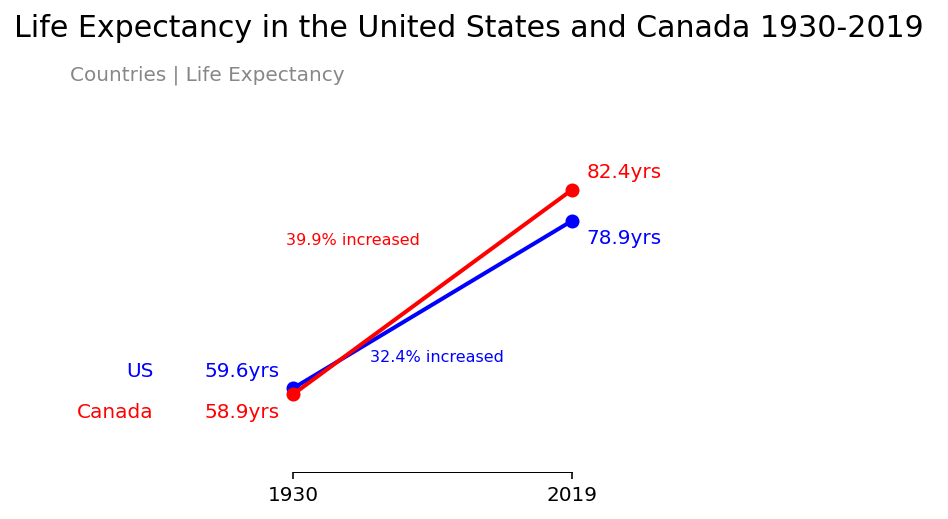

In [414]:
#https://www.reddit.com/r/dataisbeautiful/comments/i1ifsu/life_expectancy_in_the_united_states_and_canada/
#https://ourworldindata.org/life-expectancy

df_life_expectancy = pd.read_csv("../data/life-expectancy.csv")
df_life_expectancy

US_1930_life_exp = float(df_life_expectancy[(df_life_expectancy['Entity']=='United States')
                                      &(df_life_expectancy['Year']==1930)]['Life expectancy'])
US_2019_life_exp = float(df_life_expectancy[(df_life_expectancy['Entity']=='United States')
                                      &(df_life_expectancy['Year']==2019)]['Life expectancy']) 

Canada_1930_life_exp = float(df_life_expectancy[(df_life_expectancy['Entity']=='Canada')
                                      &(df_life_expectancy['Year']==1930)]['Life expectancy'])
Canada_2019_life_exp = float(df_life_expectancy[(df_life_expectancy['Entity']=='Canada')
                                      &(df_life_expectancy['Year']==2019)]['Life expectancy'])

life_exp = {'US':(US_1930_life_exp,US_2019_life_exp),
           'Canada':(Canada_1930_life_exp,Canada_2019_life_exp)}
fig, ax = plt.subplots(figsize=(3,4))
# Let's use 0 as the left-hand side and 1 as the right-hand side
# (below we will set labels to 1930 for 0 and 2019 for 1)
ax.set_xlim(0-.1,1+.1)
ax.set_ylim(50, 100)
# Draw lines and text associated with scores
for c in life_exp:
    a,b = life_exp[c]
    
    if c=='US':
        ax.text(0-.05, a+2, f"{a:.1f}yrs", color='blue',
            horizontalalignment='right', verticalalignment='center')
        ax.text(1+.05, b-2, f"{b:.1f}yrs", color='blue',
            horizontalalignment='left', verticalalignment='center')
        ax.plot([0,1], [a,b], 'o-', lw=2, c='blue')
        ax.text(0-.50, a+2, c, color='blue',
            horizontalalignment='right', verticalalignment='center')
        ax.text((0-0.5+1+0.05)*0.5,(a+b)*0.5-6, "32.4% increased", color='blue',
                horizontalalignment='left', verticalalignment='center', fontsize=8)
    else:
        ax.text(0-.05, a-2, f"{a:.1f}yrs", color='red',
            horizontalalignment='right', verticalalignment='center')
        ax.text(1+.05, b+2, f"{b:.1f}yrs", color='red',
            horizontalalignment='left', verticalalignment='center')
        ax.plot([0,1], [a,b], 'o-', lw=2, c='red')
        ax.text(0-.50, a-2, c, color='red',
            horizontalalignment='right', verticalalignment='center')
        ax.text((0-0.5+1+0.05)*0.5-0.3,(a+b)*0.5+6, "39.9% increased", color='red',
                horizontalalignment='left', verticalalignment='center', fontsize=8)


        
# Make the axes look right
plt.text(-1,100 , 'Life Expectancy in the United States and Canada 1930-2019 ', fontsize=15)
plt.text(-0.8,95 , 'Countries | Life Expectancy', color='#878787', fontsize=10)  
ax.spines['bottom'].set_bounds(0, 1)
ax.set_xticks([0,1])
ax.set_xticklabels(['1930','2019'])
ax.set_yticks([])
# Only show the bottom axis
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)
plt.show()